# ***Profiles and Levels*** 

## ***Profiles*** 

| **Profiles**                             | **Risk**   | **---**  | **Strategy** | 
|----------------------------------------|-------------|--------------------|----------------------------|
| **1. Cliente Riesgo Bajo**  | Bajo        | Bajo               |                            |                     
| **2. Cliente Riesgo Leve**  | Bajo        | Alto               |                            |                     
| **3. Cliente Riesgo Medio** | Moderado    | Moderado           |                            |                     
| **4. Cliente Riesgo Alto**  | Alto        | Bajo               |                            |                     
| **5. Cliente Riesgo Crítico**  | Alto        | Alto               |                            |                      

**Caso Base Perfil 1**: Normalizado y saldo total Bajo </p>
**Caso Base Perfil 2**: Normalizado y saldo total alto</p>
**Caso Base Perfil 3**: Mantenido y saldo total Medio</p>
**Caso Base Perfil 4**: Caido y saldo total Bajo</p>
**Caso Base Perfil 5**: Caido y saldo total Alto</p>

## ***Levels and Linguistic Descriptors***

In [41]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn import metrics
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import plotly.graph_objects as go


html_code = """
<table border="1" cellspacing="0" cellpadding="5">
    <tr>
        <th rowspan="2">Variable</th>
        <th rowspan="2">Descriptor Lingüístico</th>
        <th colspan="2">Rangos valores</th>
    </tr>
    <tr>
        <th>CDC</th>
        <th>TDC</th>
    </tr>
    <tr>
        <td rowspan="3">Riesgo de Impago</td>
        <td>Alto</td>
        <td>Caído</td>
        <td></td>
    </tr>
    <tr>
        <td>Medio</td>
        <td>Mantenido</td>
        <td></td>
    </tr>
    <tr>
        <td>Bajo</td>
        <td>Normalizado</td>
        <td></td>
    </tr>
    <tr>
        <td rowspan="5">Días Mora</td>
        <td>Muy alto</td>
        <td>>160</td>
        <td></td>
    </tr>
    <tr>
        <td>Alto</td>
        <td>131-160</td>
        <td></td>
    </tr>
    <tr>
        <td>Medio-alto</td>
        <td>71-130</td>
        <td></td>
    </tr>
    <tr>
        <td>Medio</td>
        <td>46-70</td>
        <td></td>
    </tr>
    <tr>
        <td>Bajo</td>
        <td>1-45</td>
        <td></td>
    </tr>
    <tr>
        <td rowspan="6">Saldo Total</td>
        <td>Muy alto</td>
        <td>>30MM</td>
        <td>>10</td>
    </tr>
    <tr>
        <td>Alto</td>
        <td>20-30MM</td>
        <td>7.5-10</td>
    </tr>
    <tr>
        <td>Medio</td>
        <td>10-20MM</td>
        <td>5-7.5MM</td>
    </tr>
    <tr>
        <td>Medio Bajo</td>
        <td>5-10MM</td>
        <td>2.5-5MM</td>
    </tr>
    <tr>
        <td>Bajo</td>
        <td>Hasta 5MM</td>
        <td>1-2.5MM</td>
    </tr>
    <tr>
        <td>Muy bajo</td>
        <td><1MM</td>
        <td><1MM</td>
    </tr>
    <tr>
        <td rowspan="5">Saldo Vencido</td>
        <td>Muy alto</td>
        <td>>5MM</td>
        <td></td>
    </tr>
    <tr>
        <td>Alto</td>
        <td>2MM-5MM</td>
        <td></td>
    </tr>
    <tr>
        <td>Medio</td>
        <td>900k-2MM</td>
        <td></td>
    </tr>
    <tr>
        <td>Medio Bajo</td>
        <td>400k-800k</td>
        <td></td>
    </tr>
    <tr>
        <td>Bajo</td>
        <td><400k</td>
        <td></td>
    </tr>
    <tr>
        <td rowspan="5">Cuota Vencida</td>
        <td>Muy alto</td>
        <td>>1MM</td>
        <td></td>
    </tr>
    <tr>
        <td>Alto</td>
        <td>500k-1MM</td>
        <td></td>
    </tr>
    <tr>
        <td>Medio</td>
        <td>200k-500k</td>
        <td></td>
    </tr>
    <tr>
        <td>Medio Bajo</td>
        <td>100k-200k</td>
        <td></td>
    </tr>
    <tr>
        <td>Bajo</td>
        <td><100k</td>
        <td></td>
    </tr>
    <tr>
        <td rowspan="3">Priorización</td>
        <td>Alta</td>
        <td>4-5</td>
        <td></td>
    </tr>
    <tr>
        <td>Media</td>
        <td>2-3</td>
        <td></td>
    </tr>
    <tr>
        <td>Baja</td>
        <td>1-2</td>
        <td></td>
    </tr>
    <tr>
        <td rowspan="3">Hábito de Pago</td>
        <td>Bueno</td>
        <td>Más de 3 pagos en últimos 6 meses</td>
        <td></td>
    </tr>
    <tr>
        <td>Regular</td>
        <td>2-3 pagos en últimos 6 meses</td>
        <td></td>
    </tr>
    <tr>
        <td>Malo</td>
        <td>1 pago en últimos 6 meses</td>
        <td></td>
    </tr>
    <tr>
        <td rowspan="3">Total Contactos</td>
        <td>Alto</td>
        <td>>6</td>
        <td></td>
    </tr>
    <tr>
        <td>Medio</td>
        <td>3-6</td>
        <td></td>
    </tr>
    <tr>
        <td>Bajo</td>
        <td><3</td>
        <td></td>
    </tr>
    <tr>
        <td rowspan="3">#Total Acuerdos Mes</td>
        <td>Alto</td>
        <td>0-1</td>
        <td></td>
    </tr>
    <tr>
        <td>Medio</td>
        <td>2-4</td>
        <td></td>
    </tr>
    <tr>
        <td>Bajo</td>
        <td>>4</td>
        <td></td>
    </tr>
</table>

"""

display(HTML(html_code))


## ***Membership Functions***

### ***Risk Default***

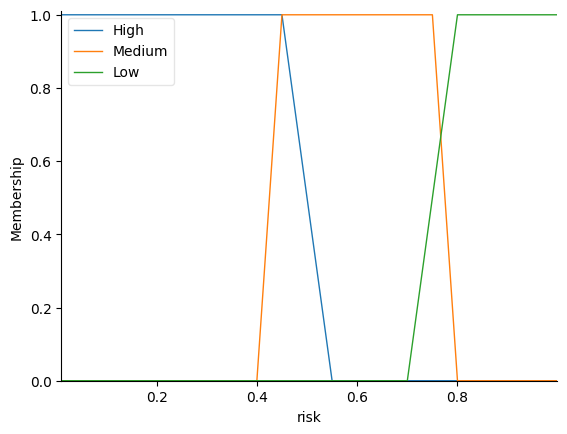

In [25]:
risk = ctrl.Antecedent(np.arange(0.01, 1, 0.001), 'risk')

risk["High"] = fuzz.trapmf(risk.universe, (0.01, 0.01, 0.45, 0.55))
risk["Medium"] = fuzz.trapmf(risk.universe, (0.4, 0.45, 0.75, 0.80))
risk["Low"] = fuzz.trapmf(risk.universe, (0.7, 0.80, 1, 1))

risk.view()#title="Membership Functions - Risk Default"
plt.show()


$$
\mu_{\text{High}}(x) =
\begin{cases} 
0, & x < 0.01 \\
1, & 0.01 \leq x \leq 0.45 \\
\frac{0.55 - x}{0.10}, & 0.45 \leq x \leq 0.55 \\
0, & x > 0.55
\end{cases}
$$

$$
\mu_{\text{Medium}}(x) =
\begin{cases} 
0, & x < 0.4 \\
\frac{x - 0.4}{0.05}, & 0.4 \leq x \leq 0.45 \\
1, & 0.45 \leq x \leq 0.75 \\
\frac{0.80 - x}{0.05}, & 0.75 \leq x \leq 0.80 \\
0, & x > 0.80
\end{cases}
$$

$$
\mu_{\text{Low}}(x) =
\begin{cases} 
0, & x < 0.7 \\
\frac{x - 0.7}{0.10}, & 0.7 \leq x \leq 0.80 \\
1, & 0.80 \leq x \leq 1 \\
0, & x > 1
\end{cases}
$$


### ***Days in arrears***

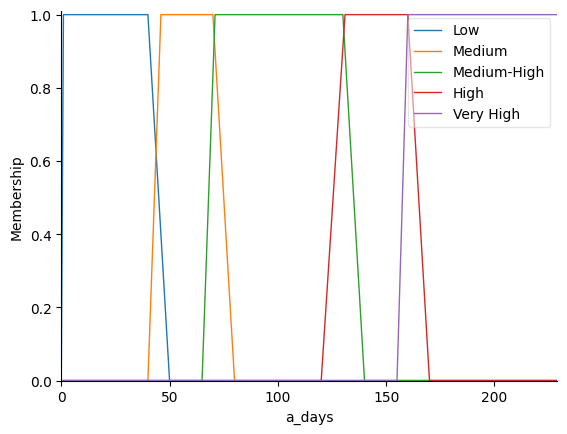

In [40]:
a_days = ctrl.Antecedent(np.arange(0, 230, 1), 'a_days')

a_days["Low"] = fuzz.trapmf(a_days.universe, [0, 1, 40, 50])
a_days["Medium"] = fuzz.trapmf(a_days.universe, [40, 46, 70, 80])
a_days["Medium-High"] = fuzz.trapmf(a_days.universe, [65, 71, 130, 140])
a_days["High"] = fuzz.trapmf(a_days.universe, [120, 131, 160, 170])
a_days["Very High"] = fuzz.trapmf(a_days.universe, [155, 160, 230, 230])

a_days.view()
plt.show()

$$
\mu_{\text{Low}}(x) =
\begin{cases}
  0, & x < 1 \\
  1, & 1 \leq x \leq 40 \\
  \frac{50 - x}{10}, & 40 \leq x \leq 50 \\
  0, & x > 50
\end{cases}
$$

$$
\mu_{\text{Medium}}(x) =
\begin{cases}
  0, & x < 40 \\
  \frac{x - 40}{6}, & 40 \leq x \leq 46 \\
  1, & 46 \leq x \leq 70 \\
  \frac{80 - x}{10}, & 70 \leq x \leq 80 \\
  0, & x > 80
\end{cases}
$$

$$
\mu_{\text{Medium-High}}(x) =
\begin{cases}
  0, & x < 65 \\
  \frac{x - 65}{6}, & 65 \leq x \leq 71 \\
  1, & 71 \leq x \leq 130 \\
  \frac{140 - x}{10}, & 130 \leq x \leq 140 \\
  0, & x > 140
\end{cases}
$$

$$
\mu_{\text{High}}(x) =
\begin{cases}
  0, & x < 120 \\
  \frac{x - 120}{11}, & 120 \leq x \leq 131 \\
  1, & 131 \leq x \leq 160 \\
  \frac{170 - x}{10}, & 160 \leq x \leq 170 \\
  0, & x > 170
\end{cases}
$$

$$
\mu_{\text{Very High}}(x) =
\begin{cases}
  0, & x < 155 \\
  \frac{x - 155}{10}, & 155 \leq x \leq 160 \\
  1, & 160 \leq x \leq 230 \\
  0, & x > 230
\end{cases}
$$

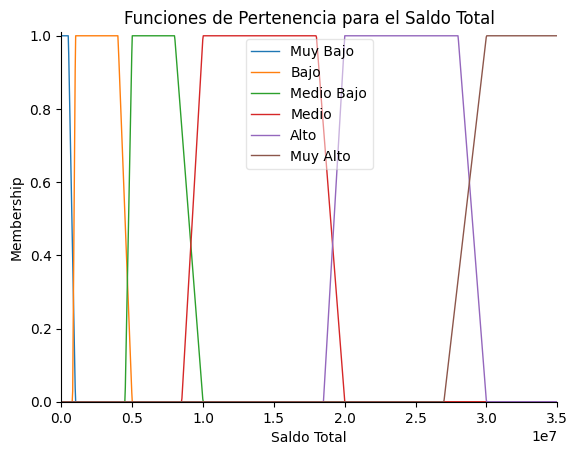

In [46]:
# Definir el universo de discurso (0 a 35M, con 1000 puntos para eficiencia)
saldo_total = ctrl.Antecedent(np.linspace(0, 35_000_000, 1000), "Saldo Total")

# Definir funciones de pertenencia trapezoidales con solapamiento
saldo_total["Muy Bajo"] = fuzz.trapmf(saldo_total.universe, [0, 0, 500_000, 1_000_000])
saldo_total["Bajo"] = fuzz.trapmf(saldo_total.universe, [800_000, 1_000_000, 4_000_000, 5_000_000])
saldo_total["Medio Bajo"] = fuzz.trapmf(saldo_total.universe, [4_500_000, 5_000_000, 8_000_000, 10_000_000])
saldo_total["Medio"] = fuzz.trapmf(saldo_total.universe, [8_500_000, 10_000_000, 18_000_000, 20_000_000])
saldo_total["Alto"] = fuzz.trapmf(saldo_total.universe, [18_500_000, 20_000_000, 28_000_000, 30_000_000])
saldo_total["Muy Alto"] = fuzz.trapmf(saldo_total.universe, [27_000_000, 30_000_000, 35_000_000, 35_000_000])

# Visualizar los conjuntos difusos
saldo_total.view()
plt.title("Funciones de Pertenencia para el Saldo Total")
plt.show()

In [42]:
# Definir el universo de discurso (saldo total en millones, ajustado a 0-300)
saldo_total = np.arange(0, 35000000, 1)  # Rango extendido a 300M

# Conjuntos difusos para CDC (0 - 300M)
saldo_cdc = {
    "Muy Bajo": fuzz.trapmf(saldo_total, [0, 0.1, 500000, 1000000]),
    "Bajo": fuzz.trapmf(saldo_total, [800000, 1000000, 4000000, 5000000]),
    "Medio Bajo": fuzz.trapmf(saldo_total, [4500000, 5000000, 8000000, 10000000]),
    "Medio": fuzz.trapmf(saldo_total, [8500000, 10000000, 18000000, 20000000]),
    "Alto": fuzz.trapmf(saldo_total, [18500000, 20000000, 28000000, 30000000]),
    "Muy Alto": fuzz.trapmf(saldo_total, [27000000, 30000000, 35000000, 35000000])
}

# # Conjuntos difusos para TDC (0 - 300M)
# saldo_tdc = {
#     "Muy Bajo": fuzz.trapmf(saldo_total, [0, 0, 1, 2]),
#     "Bajo": fuzz.trapmf(saldo_total, [1, 2, 10, 25]),
#     "Medio Bajo": fuzz.trapmf(saldo_total, [10, 25, 40, 60]),
#     "Medio": fuzz.trapmf(saldo_total, [40, 60, 90, 110]),
#     "Alto": fuzz.trapmf(saldo_total, [90, 110, 150, 200]),
#     "Muy Alto": fuzz.trapmf(saldo_total, [150, 200, 300, 300])
# }

# Graficar los conjuntos difusos para validar solapamiento
plt.figure(figsize=(12, 6))

for label, mf in saldo_cdc.items():
    plt.plot(saldo_total, mf, label=f"CDC - {label}")

# for label, mf in saldo_tdc.items():
#     plt.plot(saldo_total, mf, linestyle="dashed", label=f"TDC - {label}")

plt.title("Funciones de pertenencia difusas (CDC y TDC) con ceros definidos")
plt.xlabel("Saldo Total (Millones)")
plt.ylabel("Grado de Pertenencia")
plt.legend()
plt.grid()
plt.show()

/home/ssilvera/Escritorio/Proyectos/Modelo_pagos/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



KeyboardInterrupt: 